In [1]:
import pandas as pd
from pycaret.classification import *

# Read data
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')
submit = pd.read_csv('dataset/submit.csv')

# Merge test and submit
test_df = pd.merge(test, submit, on='id', how='left')

# Filling NaN values in specific columns
train['title'].fillna('Untitled', inplace=True)
train['author'].fillna('unknown', inplace=True)

# Dropping rows with NaN values in the 'text' column
train.dropna(subset=['text'], inplace=True)



In [2]:
# Combine text features
train['combined'] = train['title'].astype(str) + ' ' + train['author'].astype(str) + ' ' + train['text'].astype(str)

In [3]:
! pip install mlflow
# Set up PyCaret
clf1 = setup(data=train, target='label', session_id=42, log_experiment=True, experiment_name='rf_experiment')

# Compare models and select the best
best_model = compare_models()

# Create and train Random Forest model
rf = create_model('rf')

# Tune the Random Forest model
tuned_rf = tune_model(rf)


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


2024/02/05 23:37:04 INFO mlflow.tracking.fluent: Experiment with name 'rf_experiment' does not exist. Creating a new experiment.


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:37:07
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:43:16
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:43:28
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

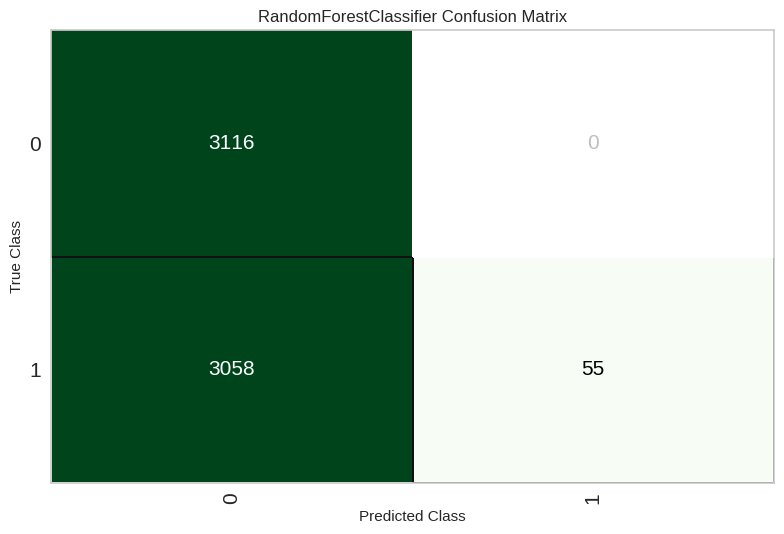

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None, include=['id'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['title', 'author'...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         cla

In [4]:
# Evaluate the tuned model
evaluate_model(tuned_rf)

# Plot confusion matrix
plot_model(tuned_rf, plot='confusion_matrix')

# Save the model
save_model(tuned_rf, 'random_forest_model')

In [5]:
# Finalize the model (optional)
final_model = finalize_model(tuned_rf)

# Predictions on the test set
test_predictions = predict_model(tuned_rf, data=test)

# Display the predictions
print(test_predictions.head())

KeyError: "['combined'] not in index"